<a href="https://colab.research.google.com/github/ciszen0131/DNA_Dijkstra_Subway/blob/main/%ED%94%84%EB%9E%91%EC%8A%A4_%EC%A0%95%EB%B6%80_%EB%B6%80%EC%B1%84_%EC%88%98%EC%A4%80_%EC%98%88%EC%B8%A1_%EB%B0%8F_%EC%A0%95%EC%B1%85_%ED%9A%A8%EA%B3%BC_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

!pip install koreanize-matplotlib
import koreanize_matplotlib

IMF = pd.read_csv('/content/drive/Shareddrives/데머 프랑스 부채 프로젝트/IMF_Data.csv')
France = pd.read_csv('/content/drive/Shareddrives/데머 프랑스 부채 프로젝트/프랑스 부채.csv', header=5)
OECD = pd.read_csv('/content/drive/Shareddrives/데머 프랑스 부채 프로젝트/OECD_Data.csv', header=5)

In [45]:
IMF = IMF.drop(IMF.columns[0:3], axis = 1)
IMF = IMF.drop(IMF.columns[2:4], axis = 1)
IMF = IMF.drop(IMF.columns[-5:-1], axis=1)
IMF = IMF.drop(IMF.columns[-1], axis=1)
IMF.value_counts()
IMF

,COUNTRY,INDICATOR,1980,1981,1982,1983,1984,1985,1986,1987,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
0,France,Unemployment rate,6.349,7.438,8.069,7.383,8.458,8.700,8.875,9.150,...,10.067,9.408,9.025,8.425,8.025,7.867,7.300,7.342,7.392,7.560
1,France,"Gross domestic product (GDP), Constant prices,...",1.809,1.186,2.404,1.262,1.673,1.670,2.325,2.567,...,0.735,2.268,1.593,2.091,-7.603,6.794,2.801,1.619,1.102,0.671
2,France,"Gross debt, General government, Percent of GDP",21.299,22.640,26.201,27.733,30.191,31.851,32.396,34.755,...,98.126,98.722,98.490,98.104,114.907,112.786,111.366,109.623,113.148,116.505
3,France,"Net lending (+) / net borrowing (-), General g...",0.757,-1.239,-1.653,-2.594,-2.775,-2.998,-3.234,-2.028,...,-3.763,-3.365,-2.322,-2.392,-8.930,-6.584,-4.737,-5.440,-5.771,-5.441
4,France,"Gross domestic product (GDP), Current prices, ...",695.475,612.552,581.254,555.956,526.671,551.596,766.302,927.257,...,2469.726,2587.955,2782.838,2723.094,2645.806,2968.405,2796.987,3061.093,3160.902,3361.557
5,France,"Expenditure, General government, Percent of GDP",46.856,49.469,50.822,52.602,53.581,54.177,53.410,52.793,...,57.379,57.665,56.369,55.345,61.697,59.463,58.429,56.833,57.175,57.323
6,Ireland,"Gross domestic product (GDP), Constant prices,...",2.898,2.512,1.495,-0.729,3.204,1.947,0.424,3.641,...,1.223,10.109,7.688,4.973,7.154,16.258,7.511,-2.536,2.599,9.113
7,Ireland,"Expenditure, General government, Percent of GDP",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27.515,25.279,24.747,23.868,26.703,23.589,20.610,22.104,22.308,21.920
8,Ireland,"Net lending (+) / net borrowing (-), General g...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.762,-0.298,0.090,0.406,-4.868,-1.367,1.668,1.524,4.086,1.047
9,Ireland,Unemployment rate,NaN,NaN,NaN,NaN,NaN,17.700,18.100,18.800,...,8.392,6.758,5.808,4.983,5.842,6.250,4.458,4.308,4.308,4.584


In [46]:
France = France.drop(France.columns[1:3], axis=1)
France.drop(France.index[6:48], inplace=True)
France

,Unnamed: 0,Q4 1995,Q1 1996,Q2 1996,Q3 1996,Q4 1996,Q1 1997,Q2 1997,Q3 1997,Q4 1997,...,Q1 2023,Q2 2023,Q3 2023,Q4 2023,Q1 2024,Q2 2024,Q3 2024,Q4 2024,Q1 2025,Q2 2025
0,General Government 일반적 정부,701.6,717.5,730.8,744.1,755.6,762.8,795.4,803.0,799.4,...,3020.8,3055.7,3095.6,3102.5,3160.8,3229.7,3301.4,3305.3,3345.4,3416.3
1,In % of GDP (*) 특정 항목에서의 GDP 대비 비율,57.8%,58.6%,59.3%,60.0%,60.6%,60.8%,63.0%,63.0%,62.0%,...,112.1%,111.3%,111.0%,109.8%,110.4%,112.1%,113.6%,113.2%,113.9%,115.6%
2,of which: State 주,488.6,506.4,515.1,530.3,533.1,544.1,568.7,573.5,568.9,...,2413.9,2470.0,2514.4,2516.5,2560.9,2630.9,2690.7,2687.0,2723.4,2787.7
3,of which: Central agencies 중앙 기관,68.1,65.0,66.1,65.3,68.2,61.6,63.1,64.0,68.7,...,73.9,72.6,71.1,73.0,73.3,68.5,68.7,69.8,69.7,68.7
4,of which: Local Government 지역 정부,111.0,111.1,112.2,110.4,112.8,110.7,109.6,109.5,105.8,...,243.8,244.2,244.0,248.1,248.9,248.6,250.0,261.9,262.5,262.4
5,of which: Social security funds 사회 보장 기금,34.0,35.1,37.4,38.1,41.5,46.4,54.1,56.0,56.1,...,289.2,268.9,266.1,264.9,277.7,281.7,292.1,286.5,289.8,297.6


In [47]:
OECD.drop(OECD.index[0:2], inplace=True)
OECD = OECD.drop(OECD.columns[1], axis=1)
OECD.drop(OECD.index[3:27], inplace=True)
OECD = OECD.drop(OECD.columns[-1], axis=1)
OECD

,Time period,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030
2,France,9.92,9.04,8.58,6.79,7.22,7.53,6.34,5.59,4.65,...,0.01,1.70,2.99,2.98,3.24,3.30,3.47,3.64,3.78,3.91
3,Ireland,10.44,9.52,9.47,7.70,7.92,8.25,7.29,6.30,4.80,...,0.06,1.75,2.87,2.72,2.77,2.83,3.06,3.26,3.48,3.65
4,Portugal,20.82,21.28,20.63,14.25,10.48,11.47,8.56,6.36,4.88,...,0.30,2.17,3.24,2.96,2.99,3.05,3.28,3.52,3.72,3.90


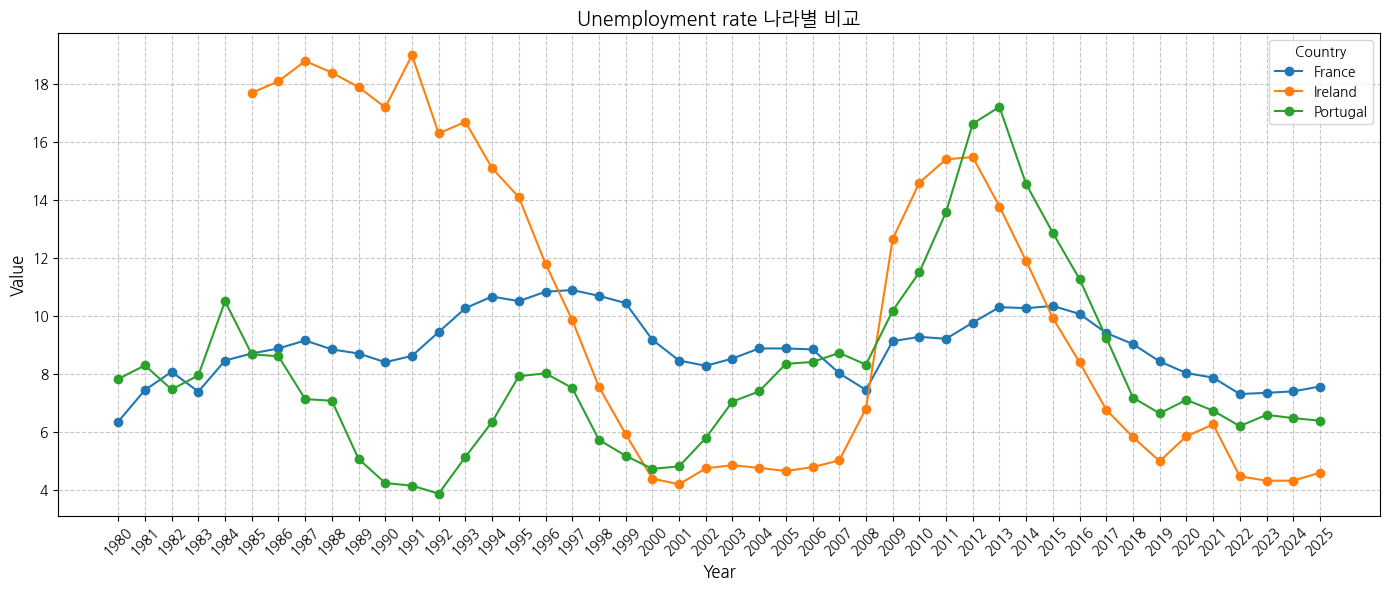

In [48]:
from matplotlib.ticker import MultipleLocator

# 시각화할 indicator 지정 (실업률)
indicator = "Unemployment rate"

# 해당 지표 데이터만 추출
df_plot = IMF[IMF["INDICATOR"] == indicator]

# 연도 컬럼들만 숫자형으로 변환
years = df_plot.columns[2:].astype(int)

plt.figure(figsize=(14, 6))

# 나라별로 그래프 그리기
for country in df_plot["COUNTRY"].unique():
    country_data = df_plot[df_plot["COUNTRY"] == country]
    values = country_data.iloc[0, 2:].astype(float)
    plt.plot(years, values, marker='o', label=country)

# 제목, 축 라벨 설정
plt.title(f"{indicator} 나라별 비교", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Value", fontsize=12)

# X축 1년 단위로 표시
plt.xticks(years, rotation=45)  # 모든 연도 직접 표시 (각도 조절)
# 또는 자동 간격 제어: plt.gca().xaxis.set_major_locator(MultipleLocator(1))

plt.legend(title="Country")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


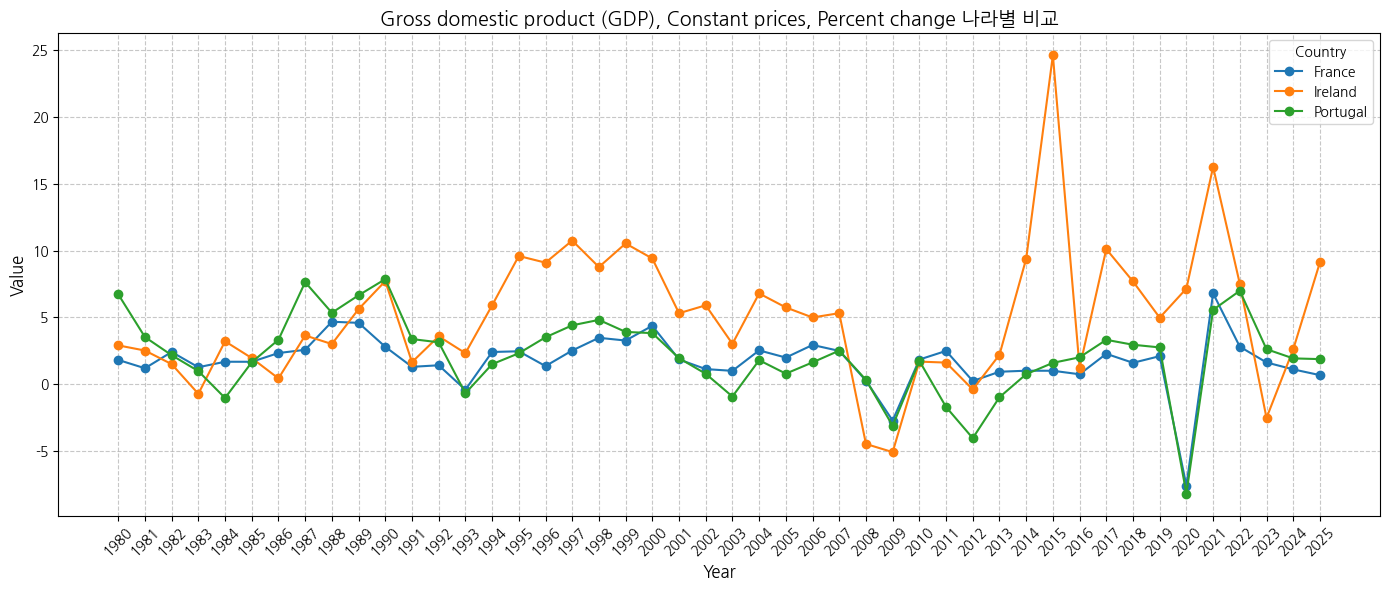

In [49]:
from matplotlib.ticker import MultipleLocator

# 시각화할 indicator 지정 (실질 GDP 성장률)
indicator = "Gross domestic product (GDP), Constant prices, Percent change"
# 해당 지표 데이터만 추출
df_plot = IMF[IMF["INDICATOR"] == indicator]

# 연도 컬럼들만 숫자형으로 변환
years = df_plot.columns[2:].astype(int)

plt.figure(figsize=(14, 6))

# 나라별로 그래프 그리기
for country in df_plot["COUNTRY"].unique():
    country_data = df_plot[df_plot["COUNTRY"] == country]
    values = country_data.iloc[0, 2:].astype(float)
    plt.plot(years, values, marker='o', label=country)

# 제목, 축 라벨 설정
plt.title(f"{indicator} 나라별 비교", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Value", fontsize=12)

# X축 1년 단위로 표시
plt.xticks(years, rotation=45)  # 모든 연도 직접 표시 (각도 조절)
# 또는 자동 간격 제어: plt.gca().xaxis.set_major_locator(MultipleLocator(1))

plt.legend(title="Country")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


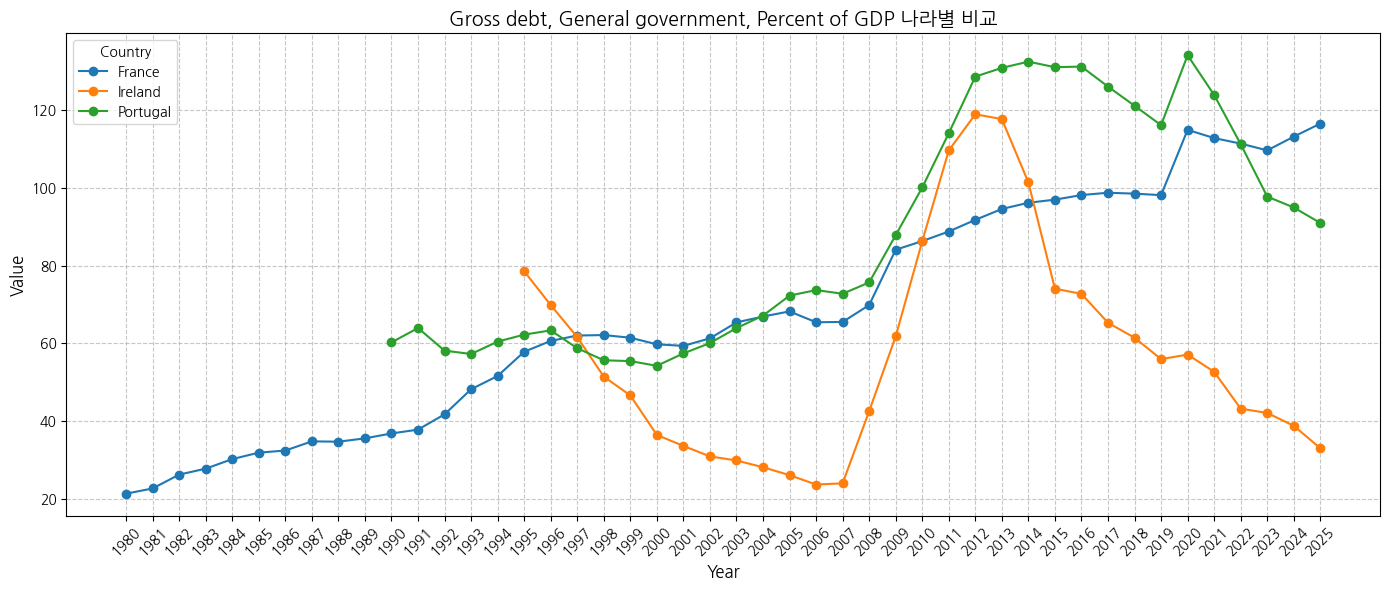

In [50]:
from matplotlib.ticker import MultipleLocator

# 시각화할 indicator 지정 (GDP 대비 부채비율)
indicator = "Gross debt, General government, Percent of GDP"  # 원하는 지표로 변경 가능

# 해당 지표 데이터만 추출
df_plot = IMF[IMF["INDICATOR"] == indicator]

# 연도 컬럼들만 숫자형으로 변환
years = df_plot.columns[2:].astype(int)

plt.figure(figsize=(14, 6))

# 나라별로 그래프 그리기
for country in df_plot["COUNTRY"].unique():
    country_data = df_plot[df_plot["COUNTRY"] == country]
    values = country_data.iloc[0, 2:].astype(float)
    plt.plot(years, values, marker='o', label=country)

# 제목, 축 라벨 설정
plt.title(f"{indicator} 나라별 비교", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Value", fontsize=12)

# X축 1년 단위로 표시
plt.xticks(years, rotation=45)  # 모든 연도 직접 표시 (각도 조절)
# 또는 자동 간격 제어: plt.gca().xaxis.set_major_locator(MultipleLocator(1))

plt.legend(title="Country")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


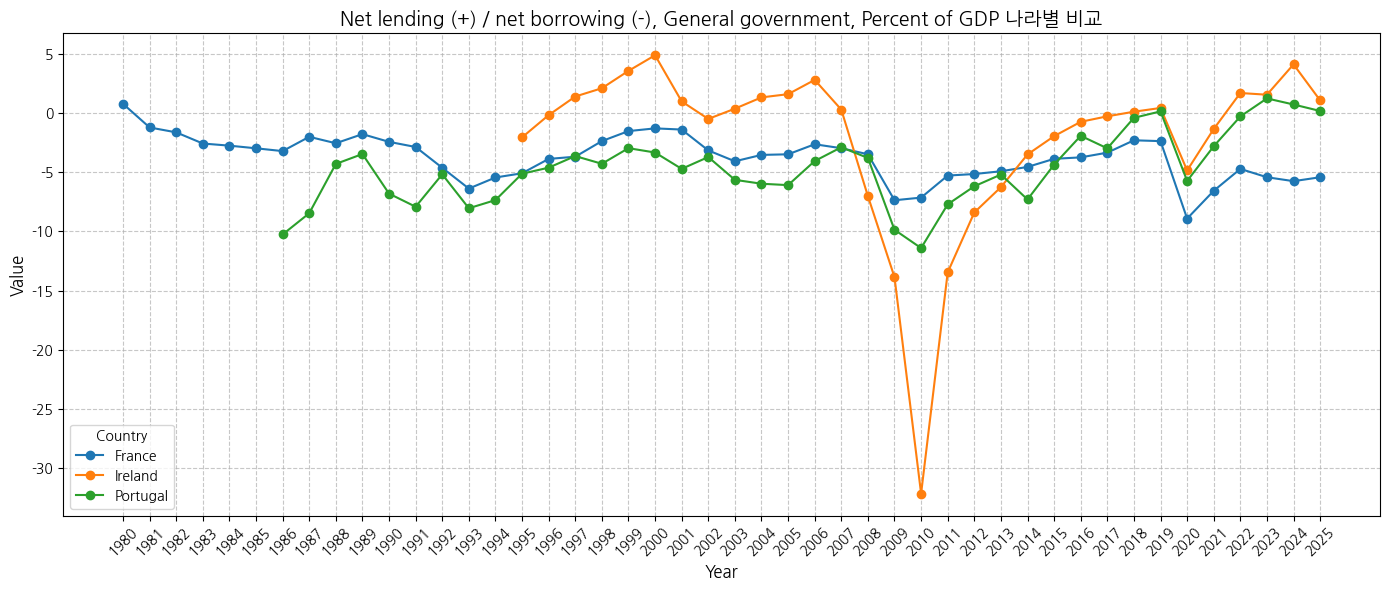

In [51]:
from matplotlib.ticker import MultipleLocator

# 시각화할 indicator 지정 (재정수지)
indicator = "Net lending (+) / net borrowing (-), General government, Percent of GDP"  # 원하는 지표로 변경 가능

# 해당 지표 데이터만 추출
df_plot = IMF[IMF["INDICATOR"] == indicator]

# 연도 컬럼들만 숫자형으로 변환
years = df_plot.columns[2:].astype(int)

plt.figure(figsize=(14, 6))

# 나라별로 그래프 그리기
for country in df_plot["COUNTRY"].unique():
    country_data = df_plot[df_plot["COUNTRY"] == country]
    values = country_data.iloc[0, 2:].astype(float)
    plt.plot(years, values, marker='o', label=country)

# 제목, 축 라벨 설정
plt.title(f"{indicator} 나라별 비교", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Value", fontsize=12)

# X축 1년 단위로 표시
plt.xticks(years, rotation=45)  # 모든 연도 직접 표시 (각도 조절)
# 또는 자동 간격 제어: plt.gca().xaxis.set_major_locator(MultipleLocator(1))

plt.legend(title="Country")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


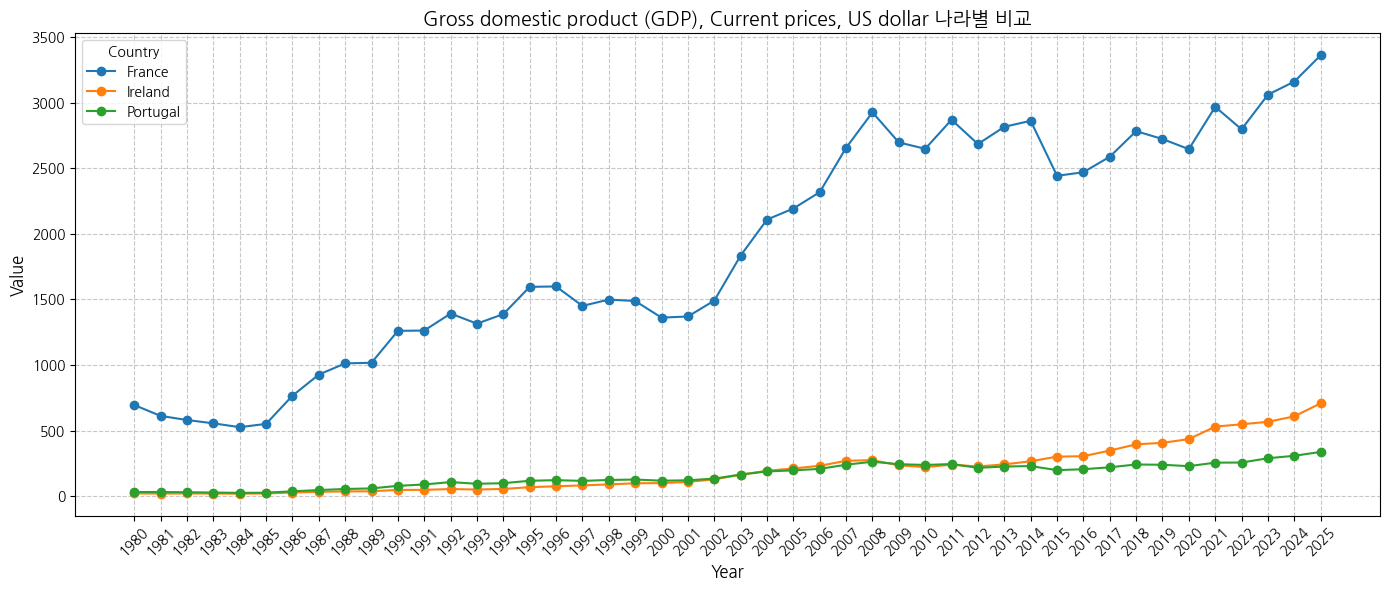

In [52]:
from matplotlib.ticker import MultipleLocator

# 시각화할 indicator 지정 (GDP)
indicator = "Gross domestic product (GDP), Current prices, US dollar"  # 원하는 지표로 변경 가능

# 해당 지표 데이터만 추출
df_plot = IMF[IMF["INDICATOR"] == indicator]

# 연도 컬럼들만 숫자형으로 변환
years = df_plot.columns[2:].astype(int)

plt.figure(figsize=(14, 6))

# 나라별로 그래프 그리기
for country in df_plot["COUNTRY"].unique():
    country_data = df_plot[df_plot["COUNTRY"] == country]
    values = country_data.iloc[0, 2:].astype(float)
    plt.plot(years, values, marker='o', label=country)

# 제목, 축 라벨 설정
plt.title(f"{indicator} 나라별 비교", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Value", fontsize=12)

# X축 1년 단위로 표시
plt.xticks(years, rotation=45)  # 모든 연도 직접 표시 (각도 조절)
# 또는 자동 간격 제어: plt.gca().xaxis.set_major_locator(MultipleLocator(1))

plt.legend(title="Country")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


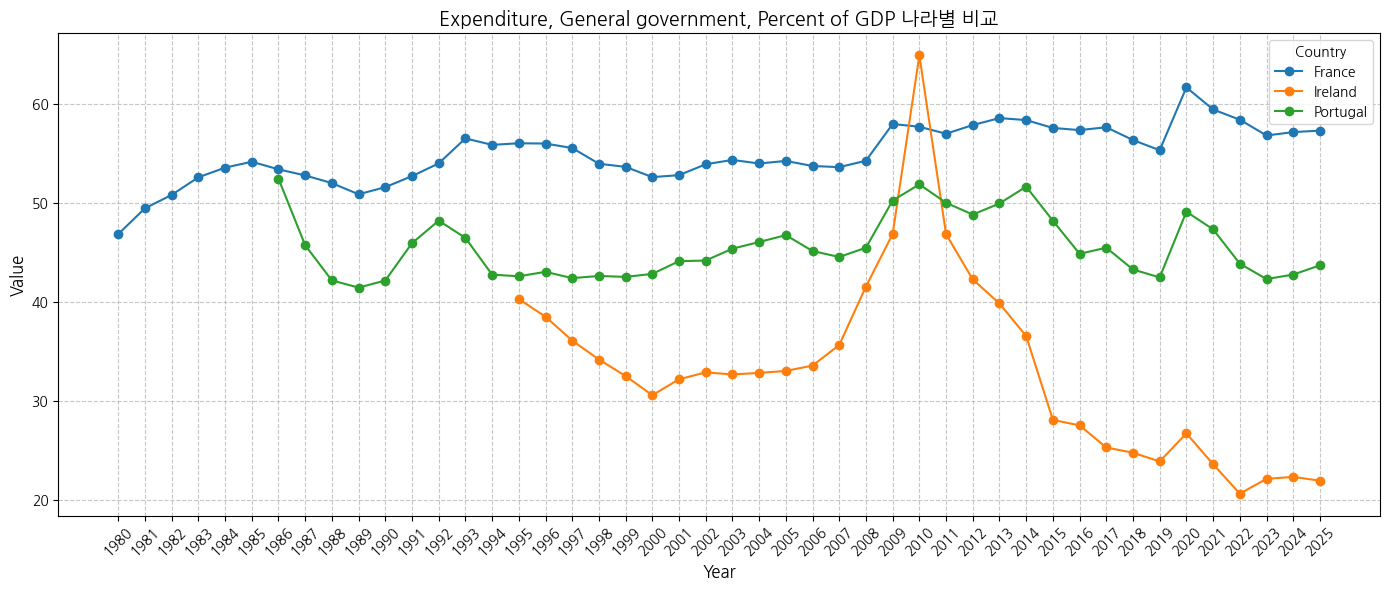

In [53]:
from matplotlib.ticker import MultipleLocator

# 시각화할 indicator 지정 (정부 지출)
indicator = "Expenditure, General government, Percent of GDP"  # 원하는 지표로 변경 가능

# 해당 지표 데이터만 추출
df_plot = IMF[IMF["INDICATOR"] == indicator]

# 연도 컬럼들만 숫자형으로 변환
years = df_plot.columns[2:].astype(int)

plt.figure(figsize=(14, 6))

# 나라별로 그래프 그리기
for country in df_plot["COUNTRY"].unique():
    country_data = df_plot[df_plot["COUNTRY"] == country]
    values = country_data.iloc[0, 2:].astype(float)
    plt.plot(years, values, marker='o', label=country)

# 제목, 축 라벨 설정
plt.title(f"{indicator} 나라별 비교", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Value", fontsize=12)

# X축 1년 단위로 표시
plt.xticks(years, rotation=45)  # 모든 연도 직접 표시 (각도 조절)
# 또는 자동 간격 제어: plt.gca().xaxis.set_major_locator(MultipleLocator(1))

plt.legend(title="Country")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


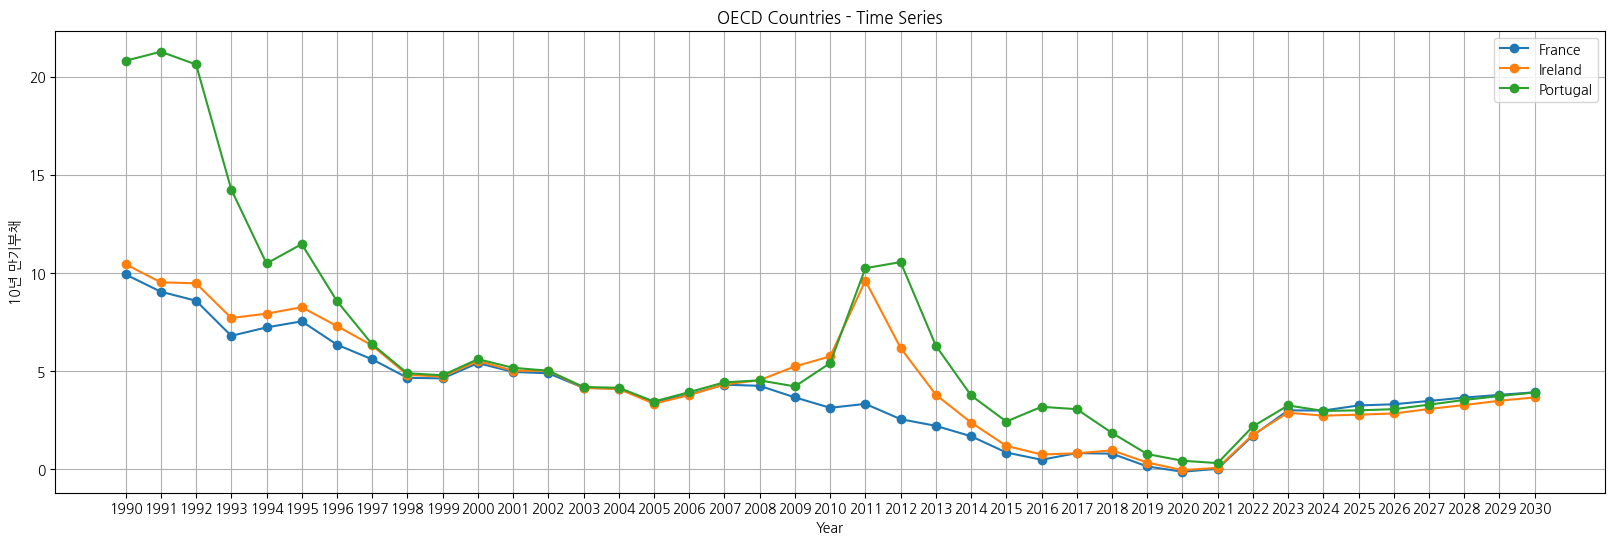

In [54]:
OECD.set_index('Time period', inplace=True)
OECD_T = OECD.T

plt.figure(figsize=(20, 6))
plt.plot(OECD_T, linestyle='-', marker='o')
plt.title('OECD Countries - Time Series')
plt.xlabel('Year')
plt.ylabel('10년 만기부채')
plt.legend(OECD_T.columns)
plt.grid(True)
plt.show()

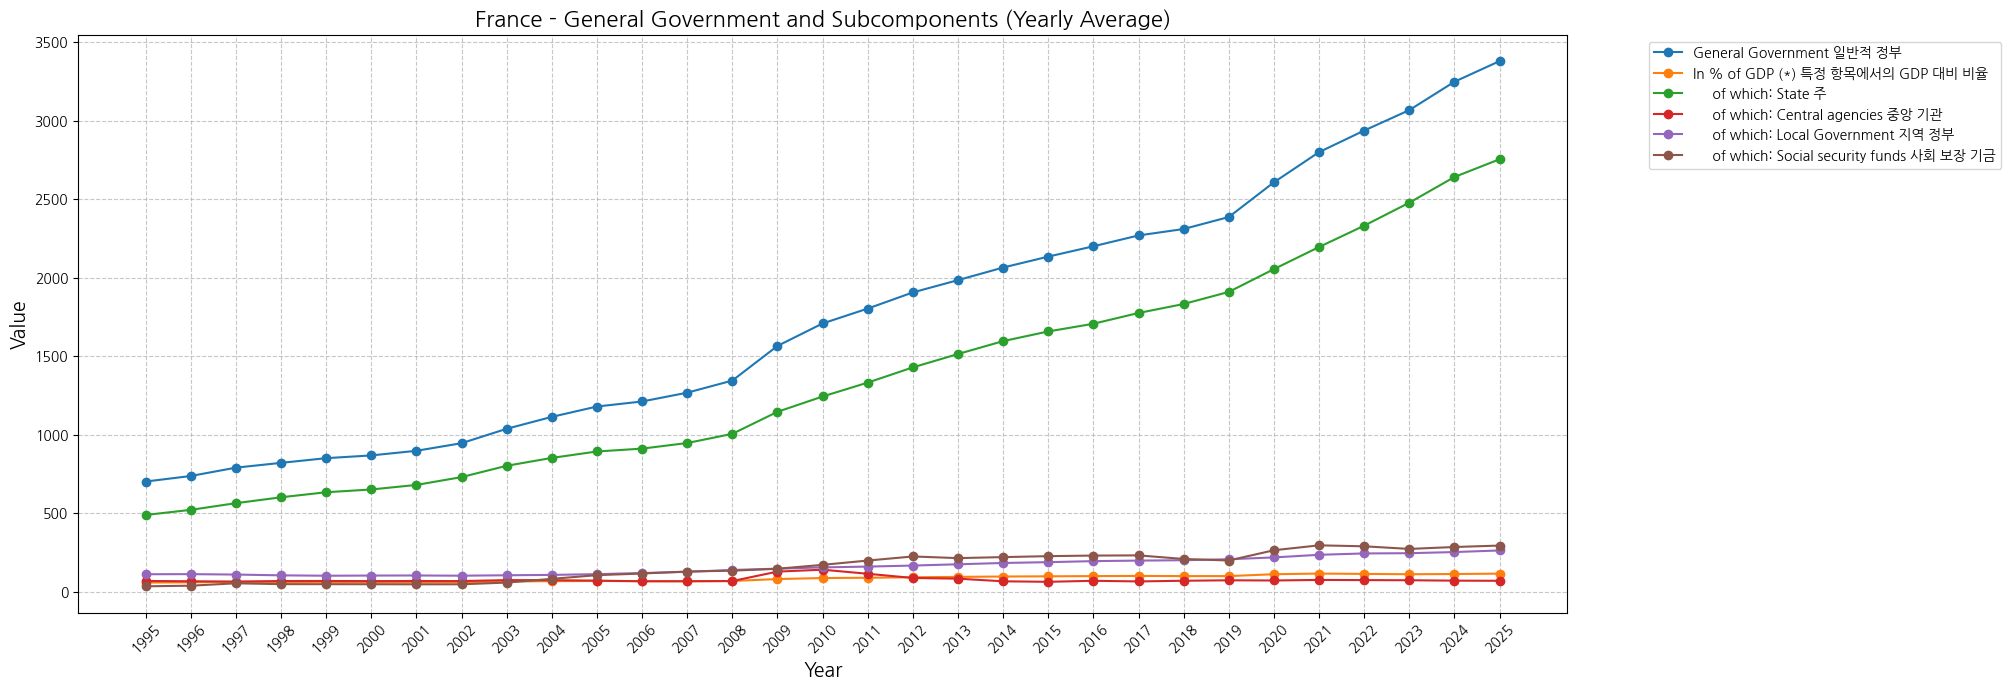

In [55]:
import matplotlib.pyplot as plt
import pandas as pd

original_data_cols_names = France.columns[1:]
years_for_grouping = [col.split()[-1] for col in original_data_cols_names]

France_cleaned = France.copy()

France_cleaned = France_cleaned.rename(columns={France_cleaned.columns[0]: 'Item'})

France_cleaned_indexed = France_cleaned.set_index('Item')

for col_name in original_data_cols_names:
    France_cleaned_indexed[col_name] = France_cleaned_indexed[col_name].astype(str).str.replace('%', '', regex=False).str.strip()
    France_cleaned_indexed[col_name] = pd.to_numeric(France_cleaned_indexed[col_name], errors='coerce')

France_T = France_cleaned_indexed.T

France_T.index = years_for_grouping

France_yearly = France_T.groupby(level=0).mean()

France_yearly = France_yearly.T

plt.figure(figsize=(24, 7))
for item_name, yearly_data in France_yearly.iterrows():
    plt.plot(yearly_data.index.astype(int), yearly_data.values, marker='o', label=item_name)

plt.title("France - General Government and Subcomponents (Yearly Average)", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Value", fontsize=14)
plt.xticks(France_yearly.columns.astype(int), rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

In [56]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

# 연도 데이터 (X)
X = np.array(France_yearly.columns.astype(int)).reshape(-1, 1)

# 예측 연도 10년 추가
future_years = np.arange(X.max()+1, X.max()+11).reshape(-1, 1)

# 결과 저장용 데이터프레임
pred_df = pd.DataFrame(index=France_yearly.index, columns=np.arange(X.min(), X.max()+11))

for item in France_yearly.index:
    y = France_yearly.loc[item].values
    model = LinearRegression()
    model.fit(X, y)

    # 기존 연도 예측 (선택 사항, 정확히 맞춰서)
    y_pred_existing = model.predict(X)
    pred_df.loc[item, X.flatten()] = y_pred_existing

    # 미래 10년 예측
    y_pred_future = model.predict(future_years)
    pred_df.loc[item, future_years.flatten()] = y_pred_future

# 숫자형으로 변환
pred_df = pred_df.astype(float)

# 확인
pred_df.head()


,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035
Item,,,,,,,,,,,,,,,,,,,,,
General Government 일반적 정부,413.672177,502.553387,591.434597,680.315806,769.197016,858.078226,946.959435,1035.840645,1124.721855,1213.603065,...,3168.989677,3257.870887,3346.752097,3435.633306,3524.514516,3613.395726,3702.276935,3791.158145,3880.039355,3968.920565
In % of GDP (*) 특정 항목에서의 GDP 대비 비율,50.716583,52.915101,55.113619,57.312137,59.510655,61.709173,63.907692,66.106210,68.304728,70.503246,...,118.870645,121.069163,123.267681,125.466200,127.664718,129.863236,132.061754,134.260272,136.458790,138.657308
of which: State 주,251.980141,325.261089,398.542036,471.822984,545.103931,618.384879,691.665827,764.946774,838.227722,911.508669,...,2523.689516,2596.970464,2670.251411,2743.532359,2816.813306,2890.094254,2963.375202,3036.656149,3109.937097,3183.218044
of which: Central agencies 중앙 기관,73.248387,73.399839,73.551290,73.702742,73.854194,74.005645,74.157097,74.308548,74.460000,74.611452,...,77.943387,78.094839,78.246290,78.397742,78.549194,78.700645,78.852097,79.003548,79.155000,79.306452
of which: Local Government 지역 정부,75.510585,81.180202,86.849819,92.519435,98.189052,103.858669,109.528286,115.197903,120.867520,126.537137,...,251.268710,256.938327,262.607944,268.277560,273.947177,279.616794,285.286411,290.956028,296.625645,302.295262


In [57]:
import pandas as pd
import numpy as np

# CSV를 헤더 없이 불러오기
France_raw = pd.read_csv('/content/drive/Shareddrives/데머 프랑스 부채 프로젝트/프랑스 부채.csv', header=None)

# 실제 데이터 시작 행 확인 (대략 5~51행)
data = France_raw.iloc[5:52, 3:]          # 5~51행, 3열 이후가 실제 수치
data.index = France_raw.iloc[5:52, 0]    # 첫 번째 컬럼을 행 이름으로
data.columns = France_raw.iloc[4, 3:]    # 4행의 3열 이후를 열 이름으로 사용

# GDP 대비 비율 행 선택
debt_pct = data.loc['In % of GDP (*) 특정 항목에서의 GDP 대비 비율']

# % 제거 후 float 변환
debt_pct = debt_pct.str.replace('%','', regex=False).astype(float)

# 연도-분기 문자열 -> 연도 float 변환
def quarter_to_year(q):
    try:
        quarter, year = q.split()
        year = int(year)
        q_map = {'Q1':0.0, 'Q2':0.25, 'Q3':0.5, 'Q4':0.75}
        return year + q_map[quarter]
    except:
        return np.nan

years = np.array([quarter_to_year(q) for q in debt_pct.index]).reshape(-1, 1)
values = debt_pct.values


아일랜드의 2011년까지의 GDP 대비 부채 비율, 실업률, 재정수지, 10년 만기부채를 우선 보여줄거임

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

# IMF 데이터에서 아일랜드 지표 추출
ireland_imf_indicators = [
    "Unemployment rate",
    "Gross debt, General government, Percent of GDP",
    "Net lending (+) / net borrowing (-), General government, Percent of GDP"
]

ireland_imf_df = IMF[(IMF["COUNTRY"] == "Ireland") & (IMF["INDICATOR"].isin(ireland_imf_indicators))]

# 연도별 데이터 추출 및 변환
ireland_imf_melted = ireland_imf_df.melt(id_vars=["COUNTRY", "INDICATOR"], var_name="Year", value_name="Value")
ireland_imf_melted["Year"] = pd.to_numeric(ireland_imf_melted["Year"], errors='coerce')
ireland_imf_melted["Value"] = pd.to_numeric(ireland_imf_melted["Value"], errors='coerce')

# 2011년까지 필터링
ireland_imf_melted = ireland_imf_melted[ireland_imf_melted["Year"] <= 2011]

# INDICATOR를 컬럼으로 피벗
ireland_imf_pivot = ireland_imf_melted.pivot_table(index='Year', columns='INDICATOR', values='Value')

# OECD 데이터에서 아일랜드 10년 만기 부채 추출
ireland_oecd_df = OECD_T[['Ireland']]
ireland_oecd_df = ireland_oecd_df[ireland_oecd_df.index.astype(int) <= 2011]
ireland_oecd_df.index = ireland_oecd_df.index.astype(int)
ireland_oecd_df = ireland_oecd_df.rename(columns={'Ireland': '10-Year Government Bond Yield'})

# 두 데이터프레임 병합
ireland_summary_2011 = pd.merge(ireland_imf_pivot, ireland_oecd_df, left_index=True, right_index=True, how='left')

# 컬럼명 한글로 변경
ireland_summary_2011 = ireland_summary_2011.rename(columns={
    'Unemployment rate': '실업률',
    'Gross debt, General government, Percent of GDP': 'GDP 대비 부채 비율',
    'Net lending (+) / net borrowing (-), General government, Percent of GDP': '재정수지',
    '10-Year Government Bond Yield': '10년 만기 부채'
})

ireland_summary_2011

,GDP 대비 부채 비율,재정수지,실업률,10년 만기 부채
Year,,,,
1985,NaN,NaN,17.700,NaN
1986,NaN,NaN,18.100,NaN
1987,NaN,NaN,18.800,NaN
1988,NaN,NaN,18.400,NaN
1989,NaN,NaN,17.900,NaN
1990,NaN,NaN,17.200,10.44
1991,NaN,NaN,19.000,9.52
1992,NaN,NaN,16.300,9.47
1993,NaN,NaN,16.700,7.70


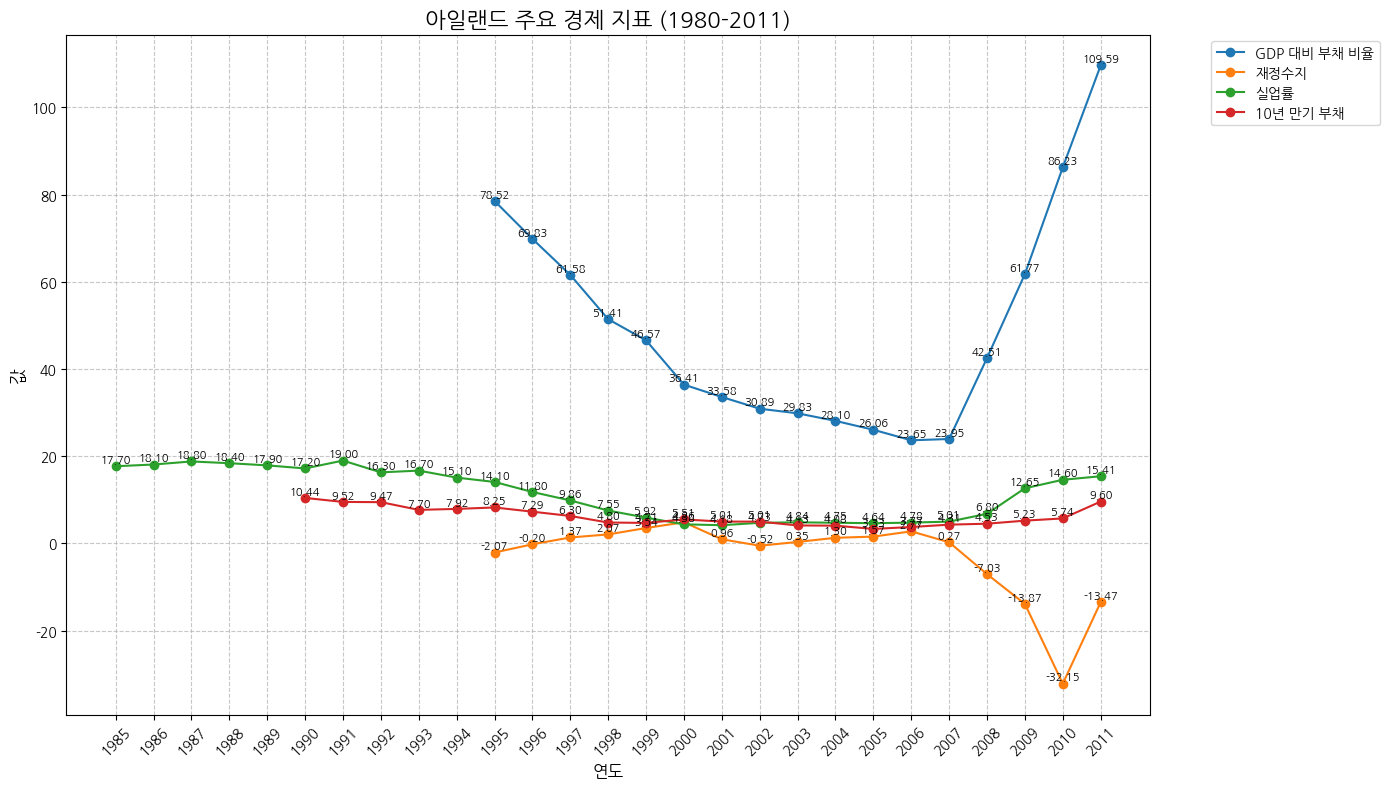

In [59]:
plt.figure(figsize=(14, 8))

# 각 지표별로 그래프 그리기
for column in ireland_summary_2011.columns:
    plt.plot(ireland_summary_2011.index, ireland_summary_2011[column], marker='o', label=column)
    # 각 지점 위에 값 표시 (NaN이 아니거나 0이 아닌 경우)
    for year, value in ireland_summary_2011[column].items():
        if pd.notna(value) and value != 0:
            plt.text(year, value + 0.5, f'{value:.2f}', fontsize=8, ha='center', va='bottom')

plt.title('아일랜드 주요 경제 지표 (1980-2011)', fontsize=16)
plt.xlabel('연도', fontsize=12)
plt.ylabel('값', fontsize=12)
plt.xticks(ireland_summary_2011.index, rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

비슷하게 포르투갈도

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

# IMF 데이터에서 포르투갈 지표 추출
portugal_imf_indicators = [
    "Unemployment rate",
    "Gross debt, General government, Percent of GDP",
    "Net lending (+) / net borrowing (-), General government, Percent of GDP"
]

portugal_imf_df = IMF[(IMF["COUNTRY"] == "Portugal") & (IMF["INDICATOR"].isin(portugal_imf_indicators))]

# 연도별 데이터 추출 및 변환
portugal_imf_melted = portugal_imf_df.melt(id_vars=["COUNTRY", "INDICATOR"], var_name="Year", value_name="Value")
portugal_imf_melted["Year"] = pd.to_numeric(portugal_imf_melted["Year"], errors='coerce')
portugal_imf_melted["Value"] = pd.to_numeric(portugal_imf_melted["Value"], errors='coerce')

# 2011년까지 필터링
portugal_imf_melted = portugal_imf_melted[portugal_imf_melted["Year"] <= 2011]

# INDICATOR를 컬럼으로 피벗
portugal_imf_pivot = portugal_imf_melted.pivot_table(index='Year', columns='INDICATOR', values='Value')

# OECD 데이터에서 포르투갈 10년 만기 부채 추출
portugal_oecd_df = OECD_T[['Portugal']]
portugal_oecd_df = portugal_oecd_df[portugal_oecd_df.index.astype(int) <= 2011]
portugal_oecd_df.index = portugal_oecd_df.index.astype(int)
portugal_oecd_df = portugal_oecd_df.rename(columns={'Portugal': '10-Year Government Bond Yield'})

# 두 데이터프레임 병합
portugal_summary_2011 = pd.merge(portugal_imf_pivot, portugal_oecd_df, left_index=True, right_index=True, how='left')

# 컬럼명 한글로 변경
portugal_summary_2011 = portugal_summary_2011.rename(columns={
    'Unemployment rate': '실업률',
    'Gross debt, General government, Percent of GDP': 'GDP 대비 부채 비율',
    'Net lending (+) / net borrowing (-), General government, Percent of GDP': '재정수지',
    '10-Year Government Bond Yield': '10년 만기 부채'
})

portugal_summary_2011

,GDP 대비 부채 비율,재정수지,실업률,10년 만기 부채
Year,,,,
1980,NaN,NaN,7.824,NaN
1981,NaN,NaN,8.290,NaN
1982,NaN,NaN,7.457,NaN
1983,NaN,NaN,7.945,NaN
1984,NaN,NaN,10.503,NaN
1985,NaN,NaN,8.674,NaN
1986,NaN,-10.271,8.603,NaN
1987,NaN,-8.479,7.126,NaN
1988,NaN,-4.316,7.069,NaN


아일랜드 포르투갈 대조

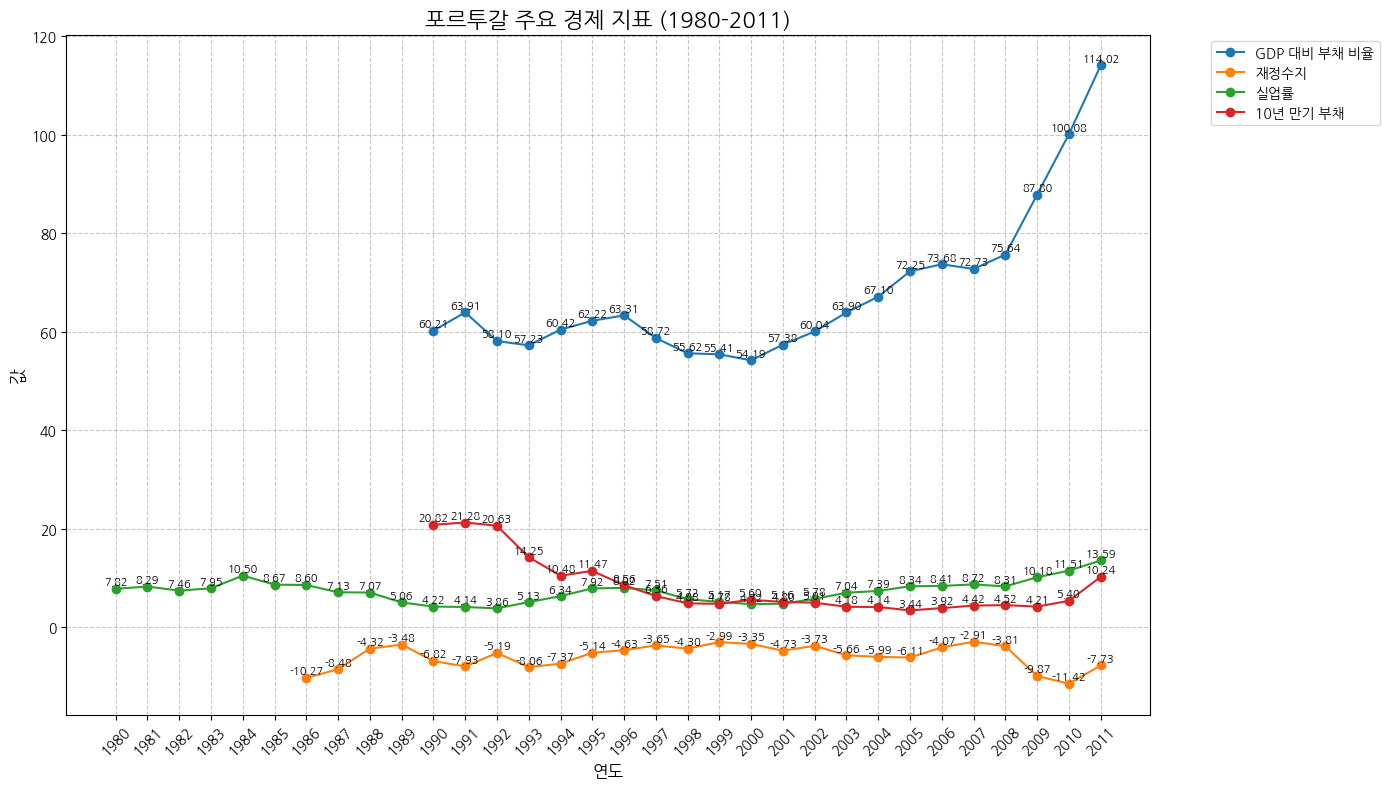

In [61]:
plt.figure(figsize=(14, 8))

# 각 지표별로 그래프 그리기
for column in portugal_summary_2011.columns:
    plt.plot(portugal_summary_2011.index, portugal_summary_2011[column], marker='o', label=column)
    # 각 지점 위에 값 표시 (NaN이 아니거나 0이 아닌 경우)
    for year, value in portugal_summary_2011[column].items():
        if pd.notna(value) and value != 0:
            plt.text(year, value + 0.5, f'{value:.2f}', fontsize=8, ha='center', va='bottom')

plt.title('포르투갈 주요 경제 지표 (1980-2011)', fontsize=16)
plt.xlabel('연도', fontsize=12)
plt.ylabel('값', fontsize=12)
plt.xticks(portugal_summary_2011.index, rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

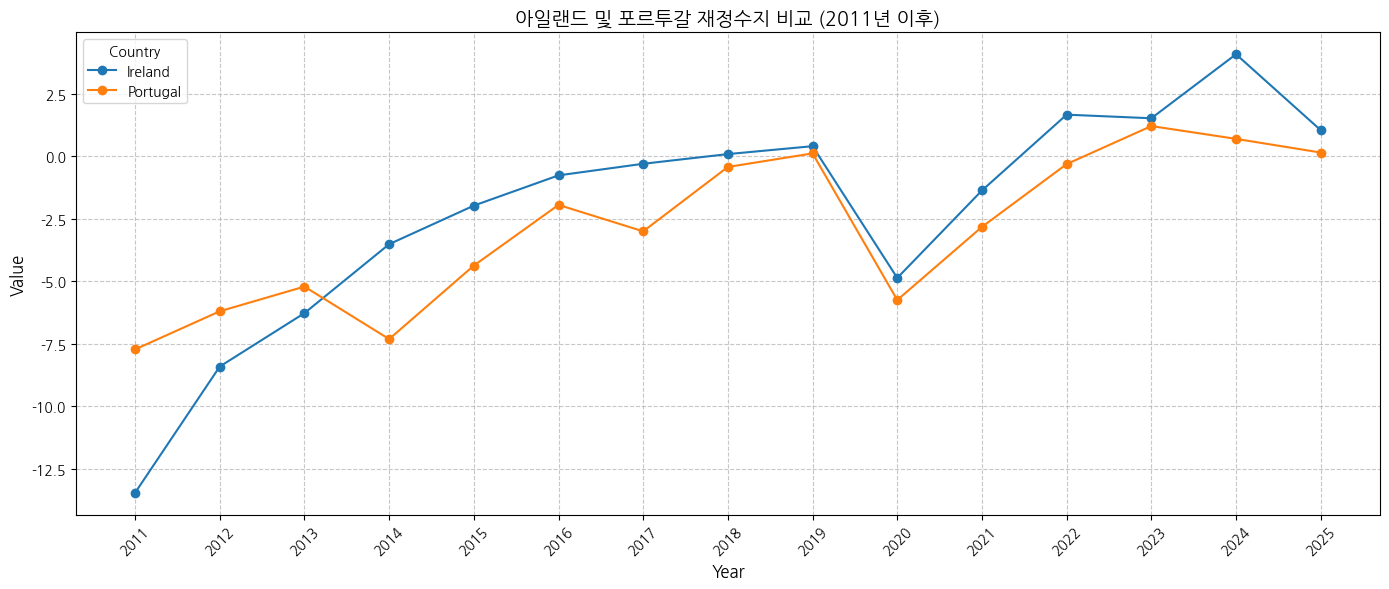

In [81]:
from matplotlib.ticker import MultipleLocator

# 시각화할 indicator 지정 (재정수지)
indicator = "Net lending (+) / net borrowing (-), General government, Percent of GDP"

# 해당 지표 데이터만 추출
df_plot = IMF[IMF["INDICATOR"] == indicator]

# 아일랜드와 포르투갈 데이터만 필터링
df_plot_countries = df_plot[df_plot["COUNTRY"].isin(["Ireland", "Portugal"])].copy()

# 연도 컬럼만 추출하고 2011년 이후로 필터링
data_columns = [col for col in df_plot_countries.columns if str(col).isdigit()]
relevant_columns = ['COUNTRY', 'INDICATOR'] + [col for col in data_columns if int(col) >= 2011]
df_plot_countries_filtered = df_plot_countries[relevant_columns]

# 필터링된 데이터프레임에서 연도 컬럼들만 숫자형으로 변환
years_filtered = df_plot_countries_filtered.columns[2:].astype(int)

plt.figure(figsize=(14, 6))

# 나라별로 그래프 그리기
for country in df_plot_countries_filtered["COUNTRY"].unique():
    country_data = df_plot_countries_filtered[df_plot_countries_filtered["COUNTRY"] == country]
    values = country_data.iloc[0, 2:].astype(float)
    plt.plot(years_filtered, values, marker='o', label=country)

# 제목, 축 라벨 설정
plt.title("아일랜드 및 포르투갈 재정수지 비교 (2011년 이후)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Value", fontsize=12)

# X축 1년 단위로 표시
plt.xticks(years_filtered, rotation=45)

plt.legend(title="Country")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

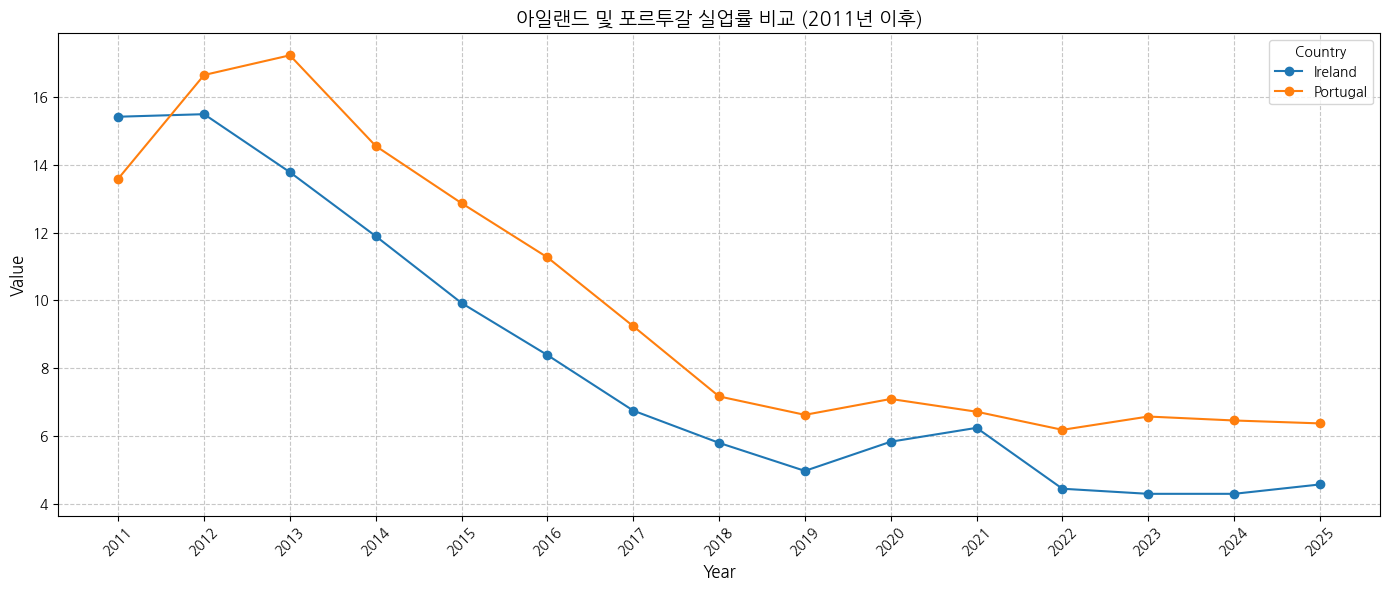

In [82]:
from matplotlib.ticker import MultipleLocator

# 시각화할 indicator 지정 (실업률)
indicator = "Unemployment rate"

# 해당 지표 데이터만 추출
df_plot = IMF[IMF["INDICATOR"] == indicator]

# 아일랜드와 포르투갈 데이터만 필터링
df_plot_countries = df_plot[df_plot["COUNTRY"].isin(["Ireland", "Portugal"])].copy()

# 연도 컬럼만 추출하고 2011년 이후로 필터링
data_columns = [col for col in df_plot_countries.columns if str(col).isdigit()]
relevant_columns = ['COUNTRY', 'INDICATOR'] + [col for col in data_columns if int(col) >= 2011]
df_plot_countries_filtered = df_plot_countries[relevant_columns]

# 필터링된 데이터프레임에서 연도 컬럼들만 숫자형으로 변환
years_filtered = df_plot_countries_filtered.columns[2:].astype(int)

plt.figure(figsize=(14, 6))

# 나라별로 그래프 그리기
for country in df_plot_countries_filtered["COUNTRY"].unique():
    country_data = df_plot_countries_filtered[df_plot_countries_filtered["COUNTRY"] == country]
    values = country_data.iloc[0, 2:].astype(float)
    plt.plot(years_filtered, values, marker='o', label=country)

# 제목, 축 라벨 설정
plt.title("아일랜드 및 포르투갈 실업률 비교 (2011년 이후)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Value", fontsize=12)

# X축 1년 단위로 표시
plt.xticks(years_filtered, rotation=45)

plt.legend(title="Country")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

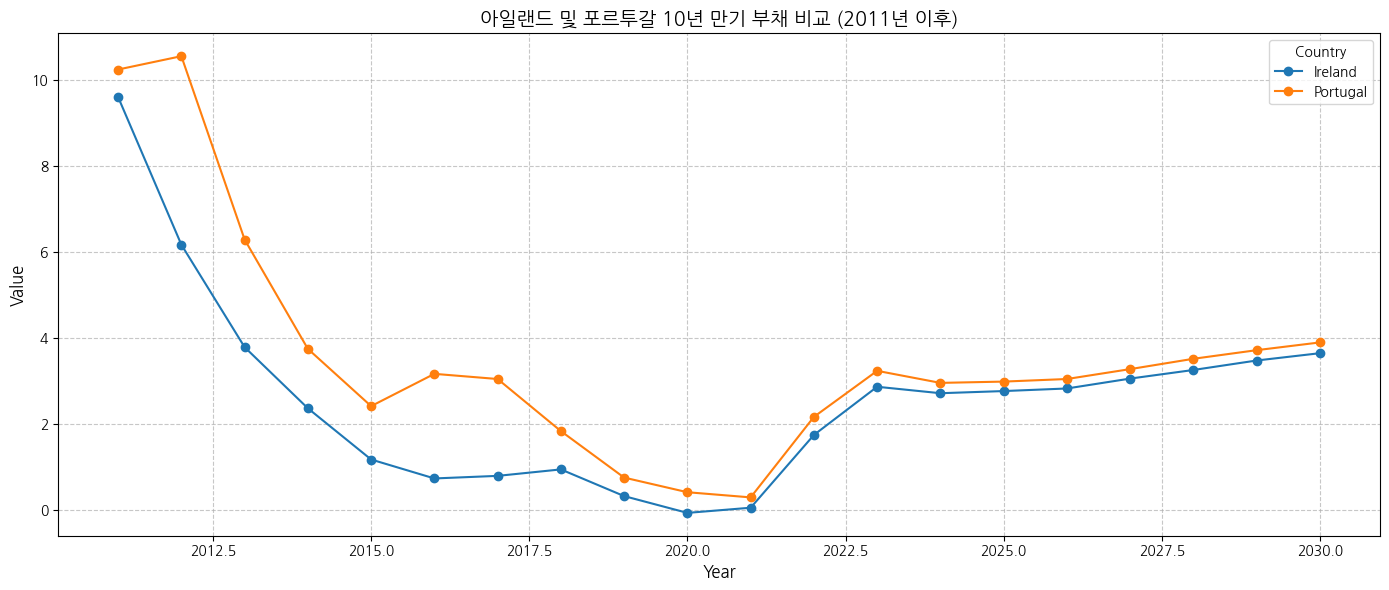

In [80]:
plt.figure(figsize=(14, 6))

# Filter OECD_T for years >= 2011
oecd_filtered_T = OECD_T[OECD_T.index.astype(int) >= 2011]

# Plot Ireland's 10-year government bond yield
plt.plot(oecd_filtered_T.index.astype(int), oecd_filtered_T['Ireland'], marker='o', label='Ireland')

# Plot Portugal's 10-year government bond yield
plt.plot(oecd_filtered_T.index.astype(int), oecd_filtered_T['Portugal'], marker='o', label='Portugal')

# Set title and labels
plt.title('아일랜드 및 포르투갈 10년 만기 부채 비교 (2011년 이후)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Value', fontsize=12)

# Add legend and grid
plt.legend(title='Country')
plt.grid(True, linestyle='--', alpha=0.7)

# Ensure all elements fit
plt.tight_layout()
plt.show()

## 요약:

### 데이터 분석 주요 결과

*   **국내총생산(GDP)**: 아일랜드의 GDP는 관찰 기간 동안 꾸준히 성장하여 포르투갈의 GDP를 크게 앞질렀습니다. 두 국가 모두 성장을 경험했지만, 아일랜드는 훨씬 더 가파르고 지속적인 증가세를 보였습니다.
*   **순 대출/순 차입(재정수지)**: 포르투갈은 대부분의 기간 동안 재정 적자(순 차입)를 유지했으며, 후반에는 흑자로 개선되는 모습을 보였습니다. 반면 아일랜드는 종종 더 변동성이 큰 재정수지를 보였으며, 적자와 흑자 기간을 모두 거쳐 결국 상당한 흑자를 달성했습니다.
*   **실업률**: 아일랜드와 포르투갈 모두 특히 경기 침체기 동안 비교적 높은 실업률을 경험했습니다. 그러나 포르투갈은 일반적으로 아일랜드보다 높은 실업률을 유지했습니다. 두 국가 모두 최근 몇 년 동안 실업률이 하락하는 추세를 보였습니다.
*   **10년 만기 국채 수익률**: 아일랜드와 포르투갈 모두 10년 만기 국채 수익률이 변동했으며, 경제적 불확실성 기간(유럽 국가 부채 위기 무렵)에 눈에 띄게 급등했습니다. 포르투갈의 국채 수익률은 대부분의 기간 동안 아일랜드보다 지속적으로 높았으며, 이는 더 높은 위험 인식을 나타냅니다.

### 통찰 또는 다음 단계

*   GDP 성장률과 재정수지로 볼 때 아일랜드의 경제 성과는 포르투갈보다 강하고 회복력이 있는 것으로 보입니다. 이는 두 국가 모두 유럽 경제임에도 불구하고 경제 구조, 정책 대응 또는 글로벌 시장 통합의 차이에서 비롯될 수 있습니다.
*   추가 분석을 통해 이러한 경제 지표를 주요 역사적 사건(예: 글로벌 금융 위기, 유럽 국가 부채 위기)과 연관시켜 두 국가의 경제 궤적과 정책 대응에 미친 영향을 이해할 수 있습니다.

프랑스 가상 시나리오 예측 및 시각화